In [2]:
pip install nltk

In [3]:
import nltk 

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
import pandas as pd

# 1. Import Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Read the train dataset from csv file
train_data = pd.read_csv('/content/drive/Shareddrives/Fouille de donnees - projet impairs/code/train.csv')
test_data = pd.read_csv('/content/drive/Shareddrives/Fouille de donnees - projet impairs/code/test.csv')
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [10]:
# show dataset classes
category = list(train_data['Class Index'].unique())
category
# on a bien 4 classes : 

[3, 4, 2, 1]


	Training dataset : 120 000 lignes (4 catégories : 30 000 lignes / catégorie)



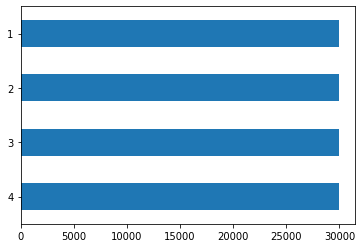

In [11]:
# show the number of items in every class of training dataset
import matplotlib.pyplot as plt
train_data['Class Index'].value_counts().plot(kind='barh')
print("\n\tTraining dataset : 120 000 lignes (4 catégories : 30 000 lignes / catégorie)\n")
plt.show()


	Testing dataset  : 7 600 lignes (4 catégories : 1 900 lignes / catégorie)



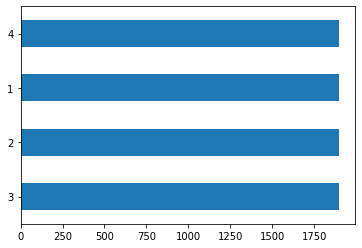

In [12]:
# show the number of items in every class of testing dataset
import matplotlib.pyplot as plt
test_data['Class Index'].value_counts().plot(kind='barh')
print("\n\tTesting dataset  : 7 600 lignes (4 catégories : 1 900 lignes / catégorie)\n")
plt.show()

*(Les classes sont très bien équilibrées).*

In [13]:
# Check null values
train_data.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

# 2. Text Preproccessing

Ci-dessous (mis en commentaire), tous les essais de pré-processing qui n'ont pas augmenté l'accuracy :

(puis dans la cellule suivante de code, c'est ce qui a été retenu comme pré-processing efficace).

In [14]:
# # Text preprocessing function
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# import re

# # data cleaning
# # def clean_data(text):
# #   # text = str(text).lower()

# #   # This removes words of up to 2 characters entirely
# #   # (Don't include the spaces ==> use \b)
# #   # text = re.sub(r'\b\w{1,1}\b', '', text)

# #   #text = re.sub(r"[^a-zA-Z]", " ", text)
# #   return text

# def preprocess(text):
#   # clean data
#   # clean_text = clean_data(text)

#   # word tokenization
#   tokens = word_tokenize(text)
#   # tokens = word_tokenize(text)

#   #Remove punctuation (ça n'aide pas, diminue l'accuracy)
#   # import string
#   # table = str.maketrans('', '', string.punctuation)
#   # tokens = [tokens[row].translate(table) for row in range(len(tokens))]

#   # Remove stop words
#   stop_words = stopwords.words("english")
#   words = [word for word in tokens if word not in stop_words]

#   # lemmatization
#   lemmatizer = WordNetLemmatizer()
#   lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

#   return " ".join(lemmatized_words)

In [15]:
# Text preprocessing function
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

def preprocess(text):

  # word tokenization
  tokens = word_tokenize(text)

  # Remove stop words
  stop_words = stopwords.words("english")
  words = [word for word in tokens if word not in stop_words]

  # lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return " ".join(lemmatized_words)

In [16]:
train_data["Preprocessed_Text"] = (train_data['Title']+' '+train_data['Description']).apply(lambda x: preprocess(x))
test_data["Preprocessed_Text"] = (test_data['Title']+' '+test_data['Description']).apply(lambda x: preprocess(x))

In [17]:
train_data.head(2)

,Class Index,Title,Description,Preprocessed_Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into Black ( Reuters ...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace ( Re...


# 3. Feature Extraction

In [18]:
# Extract article text and article category
categories = {1:'World News', 2:'Sports News', 3:'Business News', 4:'Science-Technology News'}

train_data['category'] = train_data['Class Index'].map(categories)
test_data['category'] = test_data['Class Index'].map(categories)

train_data = train_data.drop(columns=['Title'])
test_data = test_data.drop(columns=['Title'])

train_data = train_data.drop(columns=['Description'])
test_data = test_data.drop(columns=['Description'])

train_data = train_data.drop(columns=['Class Index'])
test_data = test_data.drop(columns=['Class Index'])

In [19]:
train_data.head(2)

,Preprocessed_Text,category
0,Wall St. Bears Claw Back Into Black ( Reuters ...,Business News
1,Carlyle Looks Toward Commercial Aerospace ( Re...,Business News


In [20]:
# train data
X_train = train_data['Preprocessed_Text']
Y_train = train_data['category']

# test data
X_test = test_data['Preprocessed_Text']
Y_test = test_data['category']
X_train.head(-5)

0         Wall St. Bears Claw Back Into Black ( Reuters ...
1         Carlyle Looks Toward Commercial Aerospace ( Re...
2         Oil Economy Cloud Stocks ' Outlook ( Reuters )...
3         Iraq Halts Oil Exports Main Southern Pipeline ...
4         Oil price soar all-time record , posing new me...
                                ...                        
119990    Barack Obama Gets # 36 ; 1.9 Million Book Deal...
119991    Rauffer Beats Favorites Win Downhill VAL GARDE...
119992    Iraqis Face Winter Shivering Candlelight BAGHD...
119993    AU Says Sudan Begins Troop Withdrawal Darfur A...
119994    Syria Redeploys Some Security Forces Lebanon B...
Name: Preprocessed_Text, Length: 119995, dtype: object

# 4. Encoding (TF-IDF)

In [21]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
train_features = tf_vec.fit(X_train)
train_features = tf_vec.transform(X_train)
test_features = tf_vec.transform(X_test)
train_features.shape

(120000, 63030)

Now, each of **120 000 news article** is represented by **63 030 features**, representing the tf-idf score.

 # 5. Model selection (Tester plusieurs modèles)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(weights='distance'),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, max_iter=2000),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train_features, Y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

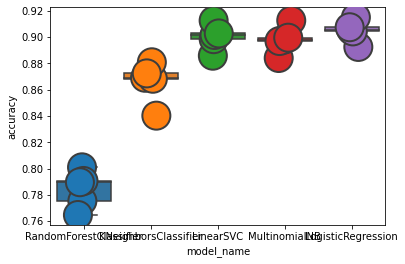

In [23]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [24]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.866233
LinearSVC                 0.900333
LogisticRegression        0.905058
MultinomialNB             0.898375
RandomForestClassifier    0.784242
Name: accuracy, dtype: float64

# 6. Model Tuning

En continuant avec notre meilleur modèle (**LogisticRegression**), nous allons regarder la matrice de confusion, et montrer les écarts entre les étiquettes prédites et réelles.

## 6.1. Logistic Regression

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

algo_name = "LogisticRegression"


logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver = 'saga', max_iter=2000, C=2.1)),
               ])
logreg.fit(X_train, Y_train)

%time

y_pred = logreg.predict(X_test)

my_tags = ['World','Sport','Business','Sci-Tech']
print("\n\tUsed algorithm : ", algo_name, "\n")
print('\naccuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred,target_names=my_tags))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 31.5 µs

	Used algorithm :  LogisticRegression 


accuracy 0.9190789473684211
              precision    recall  f1-score   support

       World       0.89      0.88      0.89      1900
       Sport       0.89      0.90      0.90      1900
    Business       0.96      0.98      0.97      1900
    Sci-Tech       0.93      0.91      0.92      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print("\n\tUsed algorithm : ", algo_name, "\n")
confusion_matrix


	Used algorithm :  LogisticRegression 



array([[1674,  148,   13,   65],
       [ 120, 1717,   11,   52],
       [  12,    7, 1866,   15],
       [  69,   50,   53, 1728]])


	Used algorithm :  LogisticRegression 



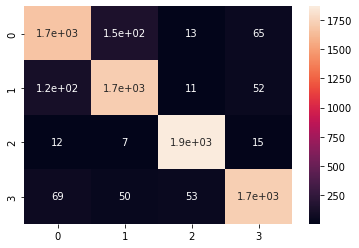

In [27]:
import seaborn as sns
print("\n\tUsed algorithm : ", algo_name, "\n")
sns.heatmap(confusion_matrix, annot=True)

# 6.2. KNN

# Choix du paramètre k le plus optimal (en utilisant la validation croisée)

### Using **cross-validation** for parameter tuning

In [28]:
########################################################################
# Ça prend vraiment beaucoup de temps (plus de 2h), au final ça donne k = 15 est le plus optimal 
########################################################################

# # creating list of K for KNN
# k_list = list(range(1,50,2))

# # creating list of cv scores
# cv_scores = []

# # perform 10-fold cross validation
# for k in k_list:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, train_features, Y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
# print([i for i in range(1,50,2)])
# print(len(k_list))

In [29]:
# changing to misclassification error
# MSE = [1 - x for x in cv_scores]

# plt.figure()
# plt.figure(figsize=(15,10))
# plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
# plt.xlabel('Number of Neighbors K', fontsize=15)
# plt.ylabel('Misclassification Error', fontsize=15)

# import seaborn as sns
# sns.set_style("whitegrid")
# plt.plot(k_list, MSE)

# plt.show()

## Affichage des résultats de tuning (pour le param k)

In [30]:
# finding best k
# best_k = k_list[MSE.index(min(MSE))]
# print("The optimal number of neighbors is %d." % best_k)

# Algorithme K-NN

In [31]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

algo_name = "KNeighborsClassifier"

# (k = 13 | k = 14 ==> acc = 6897 / 7600 = 0.9075 = 90.8% ;
#  k = 15 ==> accuracy =  6936 / 7600  =  0.9126315789473685 = 91.3% ;
#  k = 16 ==> acc= 6900/7600 =  90.7% )


# Instantiate learning model (with k = 15) 
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance')

# Fitting the model
classifier.fit(train_features, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(test_features)

# Evaluating predictions
Building **confusion matrix**:

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print("\n\tUsed algorithm : ", algo_name, "\n")
confusion_matrix


	Used algorithm :  KNeighborsClassifier 



array([[1682,  149,   21,   48],
       [ 128, 1691,   18,   63],
       [  14,   15, 1856,   15],
       [  88,   43,   62, 1707]])


	Used algorithm :  KNeighborsClassifier 



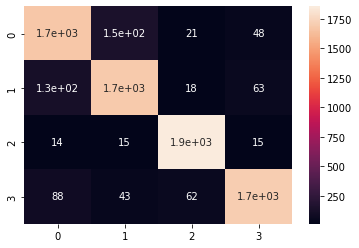

In [33]:
import seaborn as sns
print("\n\tUsed algorithm : ", algo_name, "\n")
sns.heatmap(confusion_matrix, annot=True)

# Precision, recall and accuracy

Calculates precision, recall and accuracy values without using the **sklearn.metrics.classification_report** library

In [34]:
# Classification report
from sklearn.metrics  import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

results = classification_report(Y_test, y_pred)

In [35]:
print("\n\tUsed algorithm : ", algo_name, "\n")

# Print classifiers results
print('\naccuracy %s' % accuracy_score(y_pred, Y_test))
print (results)


	Used algorithm :  KNeighborsClassifier 


accuracy 0.9126315789473685
                         precision    recall  f1-score   support

          Business News       0.88      0.89      0.88      1900
Science-Technology News       0.89      0.89      0.89      1900
            Sports News       0.95      0.98      0.96      1900
             World News       0.93      0.90      0.91      1900

               accuracy                           0.91      7600
              macro avg       0.91      0.91      0.91      7600
           weighted avg       0.91      0.91      0.91      7600



#### Notre propre calcul de: recall, precision et accuracy 

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)

# Calculating precision using confusion matrix:
# Precision = TP / (TP+FP)

# TP = true positive 
# FN = false negative
# FP = false positive
# TN = true negative


sum_diag = 0
for i in range(4):
  sum_diag += confusion_matrix[i][i]

sum_tp_fp = sum_diag
line = 0
while line < 4:
  col = line + 1
  while col < 4:
    sum_tp_fp +=  confusion_matrix[line][col]
    col+=1
  line+=1
precision = sum_diag/sum_tp_fp
print("\n\tUsed algorithm : ", algo_name, "\n")
print("\n\tprecision = ", sum_diag ,"/" , sum_tp_fp , " = ", precision, "\n")


	Used algorithm :  KNeighborsClassifier 


	precision =  6936 / 7250  =  0.9566896551724138 



In [37]:
# Calculating recall using confusion matrix:
# Recall = sum(TP) / sum(TP+FN)

sum_diag = 0
for i in range(4):
  sum_diag += confusion_matrix[i][i]

sum_tp_fn = sum_diag
line = 1
while line < 4:
  col = 0
  while col < line:
    sum_tp_fn+= confusion_matrix[line][col]
    col+=1
  line+=1
recall = sum_diag/sum_tp_fn
print("\n\tUsed algorithm : ", algo_name, "\n")
print("\n\trecall = ", sum_diag ,"/" , sum_tp_fn , " = ", recall, "\n")


	Used algorithm :  KNeighborsClassifier 


	recall =  6936 / 7286  =  0.9519626681306615 



In [38]:
# Calculating accuracy using confusion matrix:
# accuracy = sum(TP + TN) / sum(TP+FP+FN+TN)

accuracy = sum_diag/(sum_tp_fn + sum_tp_fp - sum_diag)
print("\n\tUsed algorithm : ", algo_name, "\n")
print("\n\taccuracy = sum(TP + TN) / sum(TP+FP+FN+TN)")
print("\taccuracy = ", sum_diag ,"/" , (sum_tp_fn + sum_tp_fp - sum_diag) , " = ", accuracy, "\n")


	Used algorithm :  KNeighborsClassifier 


	accuracy = sum(TP + TN) / sum(TP+FP+FN+TN)
	accuracy =  6936 / 7600  =  0.9126315789473685 

